In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import astropy.units as u

mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix',
                            'image.cmap': 'viridis'})

path = '/astro/store/gradscratch/tmp/scw7/tessData/lightcurves/all_lc/'

In [5]:
tic_gaia_table = pd.read_csv('ticGAIA.csv')
param_table = pd.read_csv('1to13_param_out.csv')
flare_table = pd.read_csv('1to13_flare_out.csv')
print(len(tic_gaia_table), len(flare_table), len(param_table))

128258 52891 243453


In [9]:
flare_gaia_table = pd.merge(tic_gaia_table, flare_table, on='TIC')
print(len(flare_gaia_table))
flare_gaia_table.columns

52891


Index(['ticid', 'TIC', 'dist', 'lum', 'G_BPbrmag', 'G_RPmag', 'G_mag',
       'Unnamed: 0', 'file', 't0', 't1', 'med', 'peak', 'ed', 'ed_err', 'mu',
       'std', 'g_amp', 'mu_err', 'std_err', 'g_amp_err', 'tpeak', 'fwhm',
       'f_amp', 'tpeak_err', 'fwhm_err', 'f_amp_err', 'f_chisq', 'g_chisq'],
      dtype='object')

In [10]:
df = flare_gaia_table
mask = (df['f_chisq'] < df['g_chisq']) & (df['f_chisq'] > 0) & (df['ed'] > 0)
df = df[mask]
print(len(df))

22793


In [18]:
ed = (df['ed'].values*u.day).to(u.s)
energy = (ed*df['lum']*u.erg/u.s).value

Text(0, 0.5, 'Number of Flares')

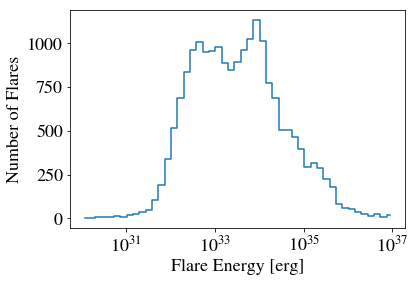

In [19]:
bins = np.logspace(30, 37)
hist, bins = np.histogram(energy[np.isfinite(energy)], bins=bins)
bins = 0.5*(bins[1:] + bins[:-1])
plt.plot(bins, hist, linestyle='steps-mid')
plt.xscale('log')
plt.xlabel('Flare Energy [erg]')
plt.ylabel('Number of Flares')

In [20]:
df_dup = df.drop_duplicates('TIC')
num_flares = np.empty(len(df_dup))
for idx in range(len(df_dup)):
    num_flares[idx] = len(df[df['TIC'] == df_dup.iloc[idx]['TIC']])

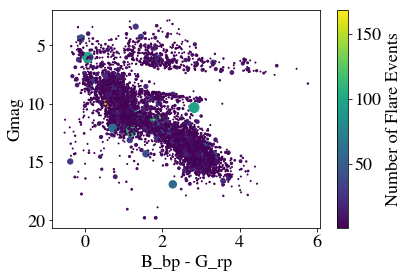

In [22]:
plt.scatter(df_dup['G_BPbrmag'][::-1] - df_dup['G_RPmag'][::-1], df_dup['G_mag'][::-1], s=num_flares, c=num_flares)
plt.gca().invert_yaxis()
plt.xlabel('B_bp - G_rp')
plt.ylabel('Gmag')
plt.colorbar(label='Number of Flare Events')